In [2]:
# !pip install jovian --upgrade --quiet

## Predicting Stock price using PyTorch neural network

### Introduction
- The act of trying to predict the future value of the stock based on the available time series data. The data points are publicly available from NSE platform.

- We will take each day closing hours data called as OHLC(Open, High, Low and Close) value of the any given stock and predict values for the future date.

- We will be picking up the LSTM Recurrent Neural system to accommodate this assignment. Shortly called as RNN is best suited for time series problem predictions such as predicting stock.

### Architecture

- Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used. #1

- LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn. #1

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png"
     alt="LSTM Chain"
     style="float: left; margin-right: 10px; width:100px; height: 100px;" />

### Datasets

We will be using publicly available datasets of National Stock Exchange (NSE) from Kaggle to train / validate / predict the stock price.

Datasets from Kaggle can be downloaded using the opendatsets

In [1]:
# !pip install opendatasets --upgrade --quiet
import opendatasets as od
od.download('https://www.kaggle.com/rohanrao/nifty50-stock-market-data')


Skipping, found downloaded files in ".\nifty50-stock-market-data" (use force=True to force download)


In [2]:
#Import dependencies to pre/post process the data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#List available archive data
import os
for dirname, _, filenames in os.walk('./nifty50-stock-market-data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./nifty50-stock-market-data/ADANIPORTS.csv
./nifty50-stock-market-data/ASIANPAINT.csv
./nifty50-stock-market-data/AXISBANK.csv
./nifty50-stock-market-data/BAJAJ-AUTO.csv
./nifty50-stock-market-data/BAJAJFINSV.csv
./nifty50-stock-market-data/BAJFINANCE.csv
./nifty50-stock-market-data/BHARTIARTL.csv
./nifty50-stock-market-data/BPCL.csv
./nifty50-stock-market-data/BRITANNIA.csv
./nifty50-stock-market-data/CIPLA.csv
./nifty50-stock-market-data/COALINDIA.csv
./nifty50-stock-market-data/DRREDDY.csv
./nifty50-stock-market-data/EICHERMOT.csv
./nifty50-stock-market-data/GAIL.csv
./nifty50-stock-market-data/GRASIM.csv
./nifty50-stock-market-data/HCLTECH.csv
./nifty50-stock-market-data/HDFC.csv
./nifty50-stock-market-data/HDFCBANK.csv
./nifty50-stock-market-data/HEROMOTOCO.csv
./nifty50-stock-market-data/HINDALCO.csv
./nifty50-stock-market-data/HINDUNILVR.csv
./nifty50-stock-market-data/ICICIBANK.csv
./nifty50-stock-market-data/INDUSINDBK.csv
./nifty50-stock-market-data/INFRATEL.csv
./nifty50-sto

- Since we are interested in Banking sector, lets train/test the data points of `SBI` into our model. 
- And finally we will be using the model hyper-parameters to predict the future values for `HDFC` 

In [3]:
#read sbi csv file
filepath = './nifty50-stock-market-data/SBIN.csv'
data = pd.read_csv(filepath)
data = data.sort_values('Date')

#print some rows
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
1,2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2,2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
3,2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
4,2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN


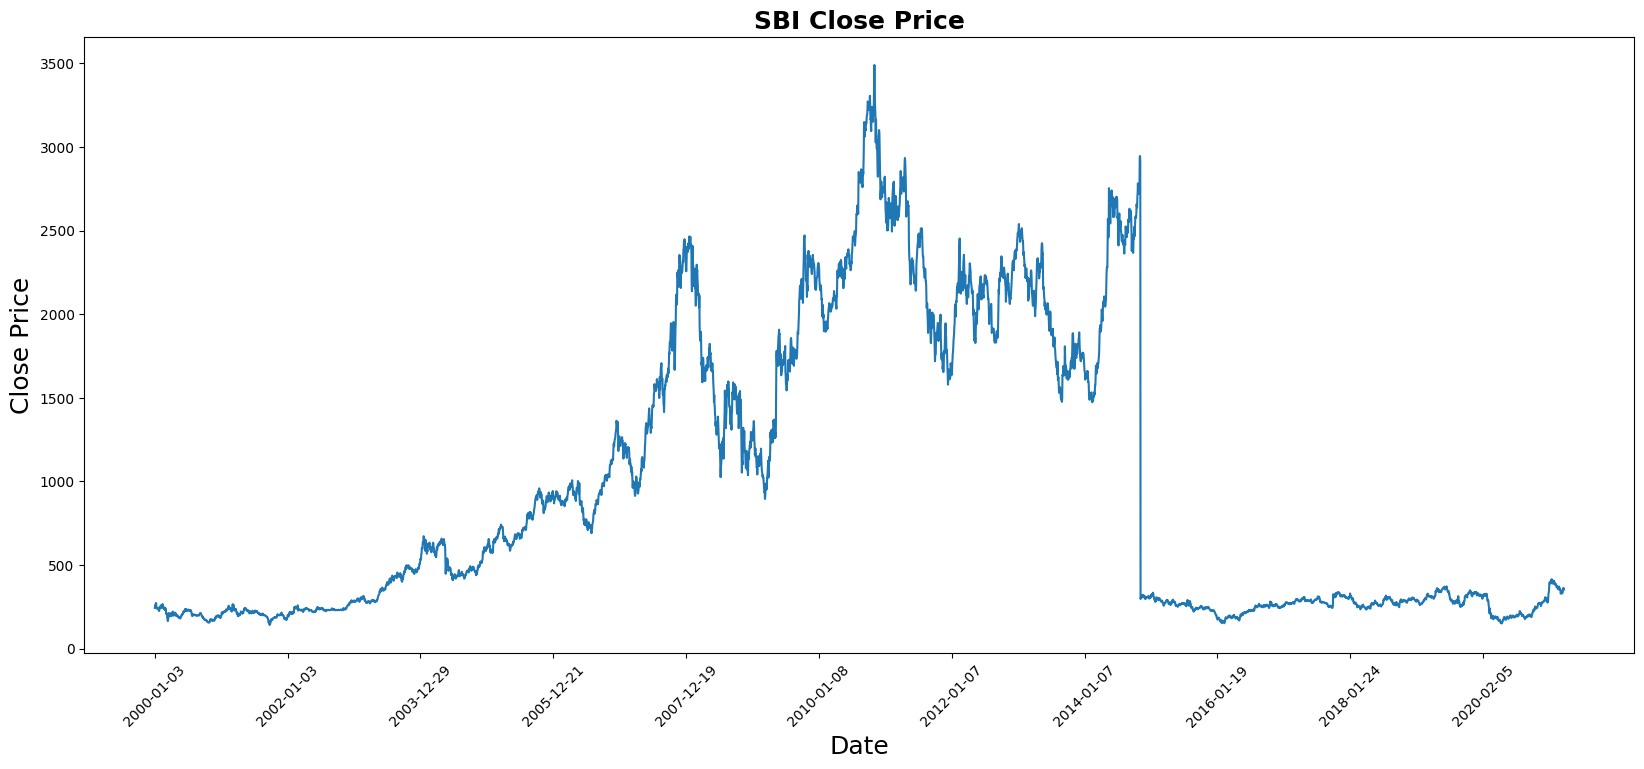

In [4]:
plt.figure(figsize = (20,8))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title("SBI Close Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [5]:
price = data[['Close']]
print(price.head())
print(price.shape)

    Close
0  243.65
1  259.10
2  248.45
3  261.00
4  273.30
(5306, 1)


**Feature Scaling**

`MinMaxScaler` transform features by scaling each feature to a given range say -1 to 1. 



In [6]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))
print(price.head())
print(price.shape)

      Close
0 -0.938958
1 -0.929730
2 -0.936091
3 -0.928595
4 -0.921248
(5306, 1)


C:\Users\sulab\AppData\Local\Temp\ipykernel_39332\3197969568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))


**Create datasets**
- Prepare 80% for training
- Prepare 20% for validation

In [7]:
#split training and validation sets manually
dataset = price.values

test_set_size = int(np.round(0.2*price.shape[0]))
train_set_size = price.shape[0] - test_set_size
print(test_set_size)
print(train_set_size)

train = dataset[0:train_set_size,:]
print(train.shape)

test = dataset[train_set_size:,:]
print(test.shape)

1061
4245
(4245, 1)
(1061, 1)


**Creating Sliding Window**

The sliding window is needed to accommodate the last 21 days close price values based on which RNN will predict the 22-nd day close price values.

Typically the intraday players go with 21/14/9 days EMI for VWAP/RSI calculations. Based out of this habit, we will be picking up high duration of 21 days for this model training.

In [9]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy()
    data = []
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

,Close
0,-0.938958
1,-0.929730
2,-0.936091
3,-0.928595
4,-0.921248
...,...
5301,-0.878841
5302,-0.873615
5303,-0.867433
5304,-0.869822


In [10]:
lookback = 21
x_train, y_train, x_test, y_test = split_data(price, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (4228, 20, 1)
y_train.shape =  (4228, 1)
x_test.shape =  (1057, 20, 1)
y_test.shape =  (1057, 1)


In [14]:
x_train[3]

array([[-0.92859489],
       [-0.92124832],
       [-0.92351799],
       [-0.93638943],
       [-0.93830073],
       [-0.93845005],
       [-0.94161565],
       [-0.94358668],
       [-0.94325818],
       [-0.93877856],
       [-0.94251157],
       [-0.94266089],
       [-0.94812603],
       [-0.95018665],
       [-0.94702105],
       [-0.93606092],
       [-0.9383306 ],
       [-0.93725549],
       [-0.93665821],
       [-0.92990891]])

In [12]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)

x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

In [13]:
input_dim = 1
hidden_dim = 16
num_layers = 3
output_dim = 1
num_epochs = 500

###LSTM Model

In [14]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach())) #2
        out = self.fc(out[:, -1, :]) 
        return out

In [15]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

###Train Model

In [16]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.30960267782211304
Epoch  1 MSE:  0.27600106596946716
Epoch  2 MSE:  0.2631660997867584
Epoch  3 MSE:  0.26481959223747253
Epoch  4 MSE:  0.24721871316432953
Epoch  5 MSE:  0.21764782071113586
Epoch  6 MSE:  0.18111076951026917
Epoch  7 MSE:  0.1342259794473648
Epoch  8 MSE:  0.0942302867770195
Epoch  9 MSE:  0.08052606135606766
Epoch  10 MSE:  0.05861689895391464
Epoch  11 MSE:  0.05489056929945946
Epoch  12 MSE:  0.05602460354566574
Epoch  13 MSE:  0.04860891029238701
Epoch  14 MSE:  0.04051131010055542
Epoch  15 MSE:  0.041197098791599274
Epoch  16 MSE:  0.04061998426914215
Epoch  17 MSE:  0.040849145501852036
Epoch  18 MSE:  0.04097205027937889
Epoch  19 MSE:  0.040781211107969284
Epoch  20 MSE:  0.039559293538331985
Epoch  21 MSE:  0.03701760247349739
Epoch  22 MSE:  0.03383700177073479
Epoch  23 MSE:  0.030644379556179047
Epoch  24 MSE:  0.02703380212187767
Epoch  25 MSE:  0.022264089435338974
Epoch  26 MSE:  0.017696747556328773
Epoch  27 MSE:  0.0156246554106473

In [17]:
actuals = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))
print(actuals.head())
preds = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
print(preds.head())

            0
0  246.499969
1  247.500000
2  258.799957
3  255.899979
4  247.400009
            0
0  241.981140
1  244.650208
2  245.921371
3  252.656006
4  253.743256


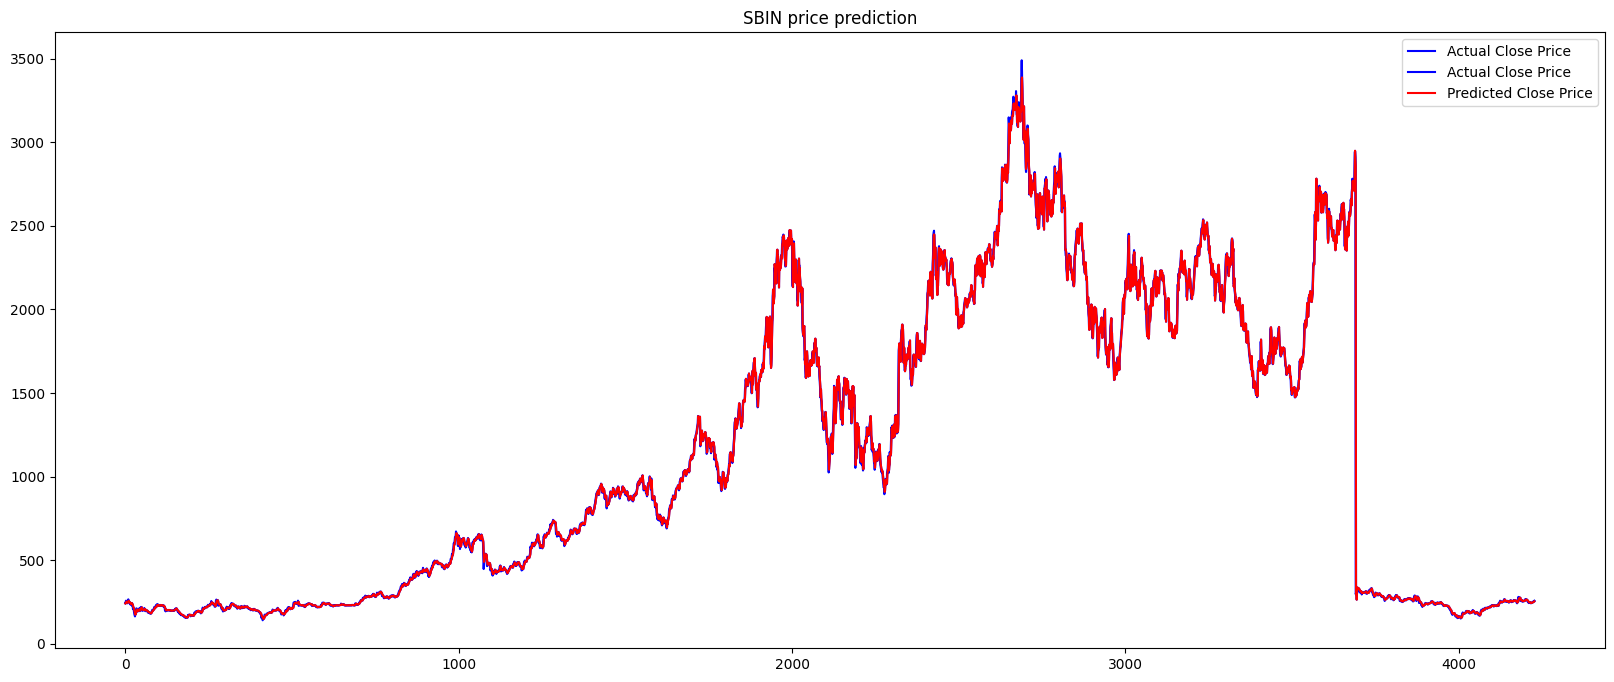

In [18]:
#Plot all predictions
train = price[0:len(actuals)]
valid = actuals
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(valid, color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Close Price')
plt.title('SBIN price prediction')
plt.legend()
plt.show()

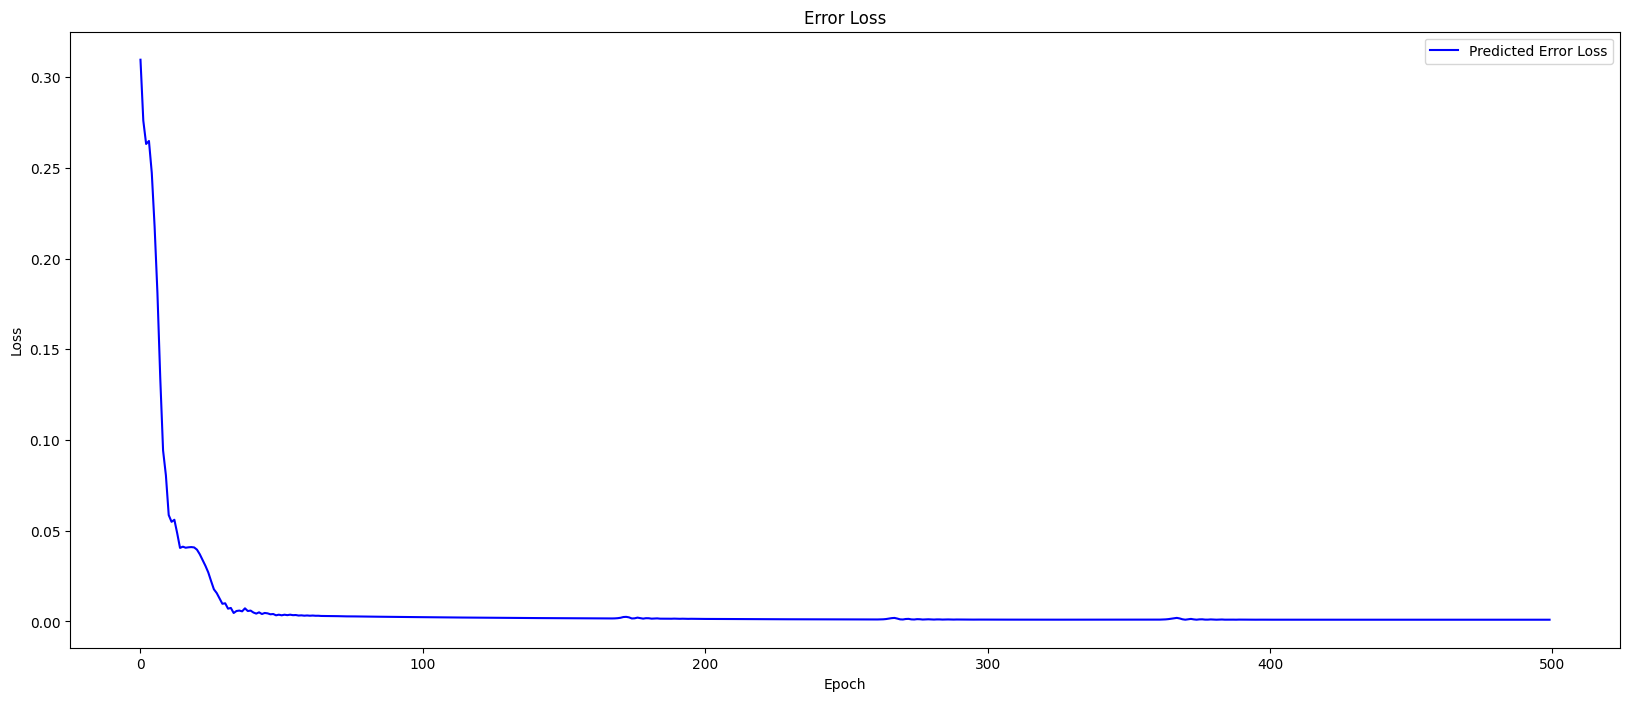

In [19]:
#Plot error loss
epochs = np.arange(num_epochs)
plt.figure(figsize=(20,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Predict on Test Data**

In [20]:
print(x_test.shape)
print(y_test.shape)

torch.Size([1057, 20, 1])
(1057, 1)


In [21]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())

y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

**Calculate Root Mean Square Errors for Loss**

In [22]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 51.12 RMSE
Test Score: 7.72 RMSE


Actual Close Scalar
        0
0  243.65
1  259.10
2  248.45
3  261.00
4  273.30
Predicted Close Scalar
            0
0  256.484467
1  257.287201
2  253.905228
3  254.309387
4  254.472641


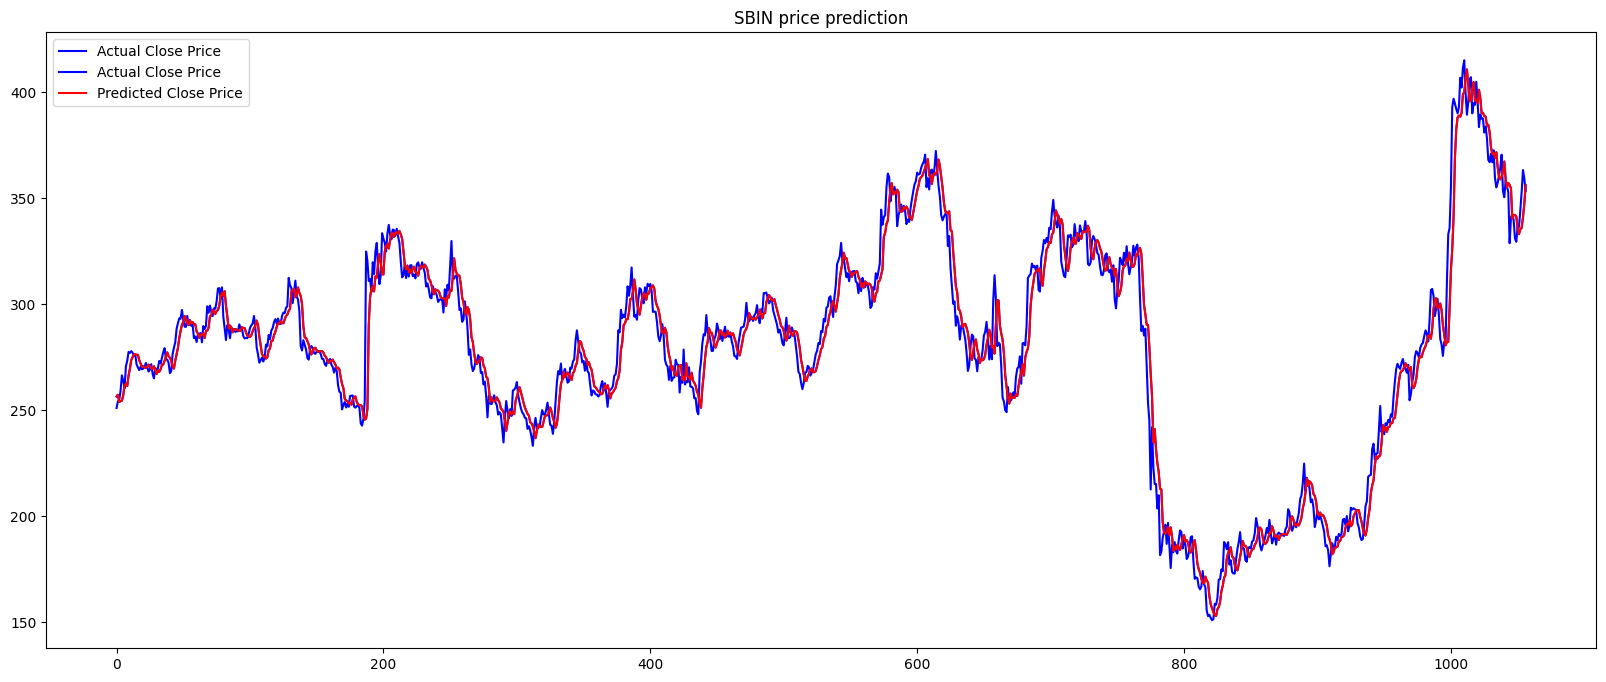

In [23]:
#Shift test predictions for plotting
original = scaler.inverse_transform(price['Close'].values.reshape(-1,1))
actuals = pd.DataFrame(original)
print("Actual Close Scalar")
print(actuals.head())
preds = pd.DataFrame(y_test_pred)
print("Predicted Close Scalar")
print(preds.head())

#Prepare actual close entries
aScalar = actuals[len(price) - len(preds):len(price)]

#Reset indexes for actuals for last 1037 entries
aScalar = aScalar.reset_index(drop=True)

#Plot predictions/actuals close price for test entries
valid = aScalar
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(valid, color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Close Price')
plt.title('SBIN price prediction')
plt.legend()
plt.show()

Since we are happy with the prediction output, we are curious to save the state of the model to future use.

Use `torch.save()` to save the model state parameters. 

In [24]:
save_model = "predict_stock_price_using_lstm_in_pytorch"
torch.save(model.state_dict(), save_model)
list(model.parameters())

[Parameter containing:
 tensor([[-3.9996e-01],
         [-1.1977e-01],
         [ 5.6206e-02],
         [ 2.2859e-01],
         [-3.4000e-02],
         [-1.1438e-01],
         [-3.6120e-01],
         [-3.6648e-01],
         [ 3.4962e-01],
         [-3.4249e-01],
         [-2.3567e-01],
         [-1.9038e-01],
         [ 9.5974e-02],
         [-2.4028e-01],
         [-1.1726e-01],
         [-1.5861e-01],
         [-3.7133e-02],
         [-1.7342e-02],
         [ 2.6262e-01],
         [ 4.3572e-01],
         [-5.4773e-02],
         [ 1.9317e-01],
         [ 5.8994e-02],
         [ 4.7670e-02],
         [ 4.6556e-01],
         [-3.5563e-01],
         [ 7.2784e-05],
         [-2.2529e-01],
         [ 3.8886e-02],
         [ 1.1528e-01],
         [ 9.7246e-02],
         [-1.9246e-01],
         [ 2.9198e-01],
         [-1.7411e-01],
         [-3.0573e-01],
         [ 4.1775e-01],
         [ 3.3950e-01],
         [ 3.9039e-01],
         [ 2.7086e-01],
         [-4.3234e-01],
         [ 3.8775

### Predict from saved Model

- Lets hope to predict a new stock price based out of the saved model above.

- To load the model with all state parameters, we may use `torch.load()` method.

In [25]:
saved_model = "predict_stock_price_using_lstm_in_pytorch"
model2 = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
model2.load_state_dict(torch.load(saved_model))
model2.eval()
list(model.parameters())

[Parameter containing:
 tensor([[-3.9996e-01],
         [-1.1977e-01],
         [ 5.6206e-02],
         [ 2.2859e-01],
         [-3.4000e-02],
         [-1.1438e-01],
         [-3.6120e-01],
         [-3.6648e-01],
         [ 3.4962e-01],
         [-3.4249e-01],
         [-2.3567e-01],
         [-1.9038e-01],
         [ 9.5974e-02],
         [-2.4028e-01],
         [-1.1726e-01],
         [-1.5861e-01],
         [-3.7133e-02],
         [-1.7342e-02],
         [ 2.6262e-01],
         [ 4.3572e-01],
         [-5.4773e-02],
         [ 1.9317e-01],
         [ 5.8994e-02],
         [ 4.7670e-02],
         [ 4.6556e-01],
         [-3.5563e-01],
         [ 7.2784e-05],
         [-2.2529e-01],
         [ 3.8886e-02],
         [ 1.1528e-01],
         [ 9.7246e-02],
         [-1.9246e-01],
         [ 2.9198e-01],
         [-1.7411e-01],
         [-3.0573e-01],
         [ 4.1775e-01],
         [ 3.3950e-01],
         [ 3.9039e-01],
         [ 2.7086e-01],
         [-4.3234e-01],
         [ 3.8775

In [26]:
filepath = './nifty50-stock-market-data/HDFC.csv'
hdfc_data = pd.read_csv(filepath)
hdfc_data = hdfc_data.sort_values('Date')
hdfc_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


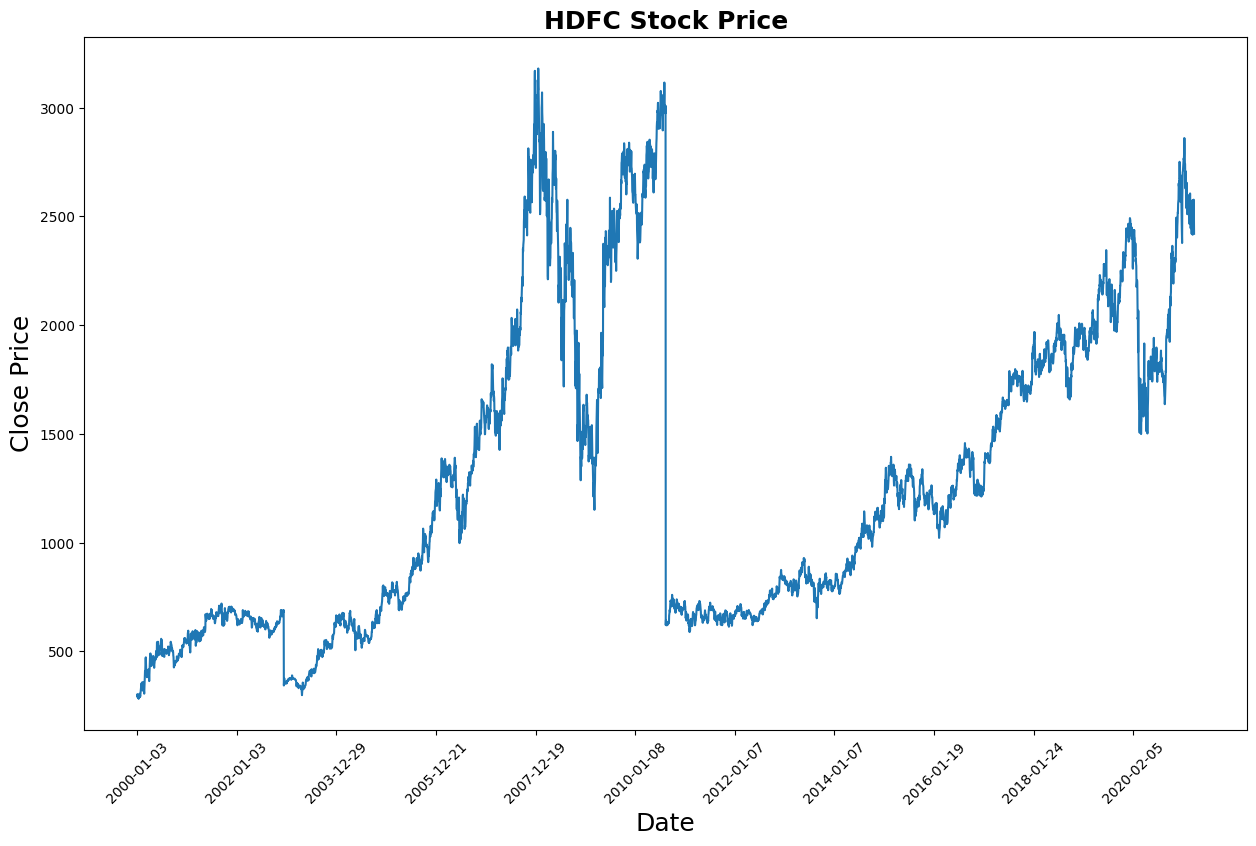

In [27]:
plt.figure(figsize = (15,9))
plt.plot(hdfc_data[['Close']])
plt.xticks(range(0,hdfc_data.shape[0],500),hdfc_data['Date'].loc[::500],rotation=45)
plt.title("HDFC Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [28]:
hdfc_price = hdfc_data[['Close']]
hdfc_price.info()
print(hdfc_price)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5306 entries, 0 to 5305
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5306 non-null   float64
dtypes: float64(1)
memory usage: 82.9 KB
        Close
0      293.50
1      304.05
2      292.80
3      296.45
4      286.55
...       ...
5301  2509.80
5302  2518.40
5303  2577.00
5304  2538.85
5305  2420.10

[5306 rows x 1 columns]


In [29]:
scaler = MinMaxScaler(feature_range=(-1, 1))
hdfc_price['Close'] = scaler.fit_transform(hdfc_price['Close'].values.reshape(-1,1))
print(price.head())
print(price.shape)

      Close
0 -0.938958
1 -0.929730
2 -0.936091
3 -0.928595
4 -0.921248
(5306, 1)


C:\Users\sulab\AppData\Local\Temp\ipykernel_9040\3713918018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdfc_price['Close'] = scaler.fit_transform(hdfc_price['Close'].values.reshape(-1,1))


In [30]:
def test_data(stock, lookback):
    data_raw = stock.to_numpy()
    data = []
    # create all possible window length
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    x_test = data[:,:-1]
    y_test = data[:,-1,:]
    
    return [x_test, y_test]

In [31]:
lookback = 21
x_hdfc_test, y_hdfc_test = test_data(hdfc_price, lookback)
print('x_hdfc_test.shape = ',x_hdfc_test.shape)
print('y_hdfc_test.shape = ',y_hdfc_test.shape)
x_hdfc_test = torch.from_numpy(x_hdfc_test).type(torch.Tensor)
y_hdfc_test = torch.from_numpy(y_hdfc_test).type(torch.Tensor)

x_hdfc_test.shape =  (5285, 20, 1)
y_hdfc_test.shape =  (5285, 1)


In [32]:
# make predictions
y_hdfc_test_pred = model2(x_hdfc_test)
print(y_hdfc_test_pred.shape)

# invert predictions
y_test_pred = scaler.inverse_transform(y_hdfc_test_pred.detach().numpy())
print('y_test_pred shape', y_test_pred.shape)
print(y_test_pred)
y_test = scaler.inverse_transform(y_hdfc_test.detach().numpy())
print('y_test shape', y_test.shape)

# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(testScore)

torch.Size([5285, 1])
y_test_pred shape (5285, 1)
[[ 324.026  ]
 [ 336.71295]
 [ 342.9438 ]
 ...
 [2499.5637 ]
 [2512.969  ]
 [2577.4019 ]]
y_test shape (5285, 1)
Test Score: 48.57 RMSE


(5306, 1)
(5285, 1)
(5285, 1)
        0
0  293.50
1  304.05
2  292.80
3  296.45
4  286.55
            0
0  324.026001
1  336.712952
2  342.943787
3  341.717834
4  349.405457


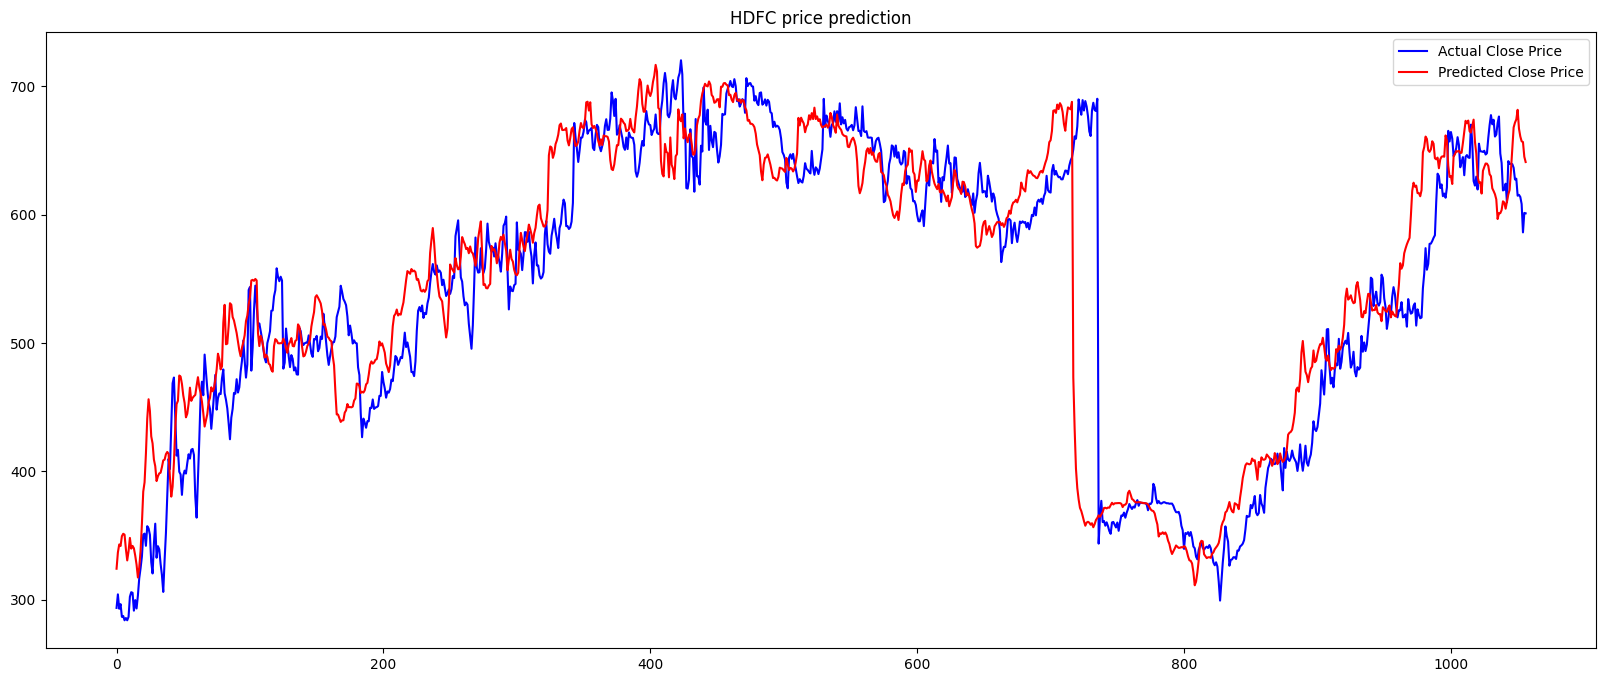

In [33]:
# shift test predictions for plotting
original = scaler.inverse_transform(hdfc_price['Close'].values.reshape(-1,1))
print(original.shape)
print(y_test_pred.shape)
print(y_test.shape)

##
actuals = pd.DataFrame(original)
print(actuals.head())
predictions = pd.DataFrame(y_test_pred)
print(predictions.head())

#Plot predictions/actuals close price for test entries
valid['Actual'] = actuals
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.plot(valid['Actual'], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Close Price')
plt.title('HDFC price prediction')
plt.legend()
plt.show()

In [34]:
print(x_hdfc_test.shape, y_hdfc_test[0])
print(y_test_pred)

torch.Size([5285, 20, 1]) tensor([-0.9539])
[[ 324.026  ]
 [ 336.71295]
 [ 342.9438 ]
 ...
 [2499.5637 ]
 [2512.969  ]
 [2577.4019 ]]


### References
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_lstm_neuralnetwork/
- https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632

**Save to Jovian**


### Conclusion
 
1. Able to hit MSE as low as `49.48` for training on one specific Stock. If we are able to train on all available `Stocks, we might able to reduce the MSE as low as possible and prediction will be much better.

2. We picked LSTM as the base model for the prediction. I am exploring and extending this work to include `ARIMA`. Based on further validation runs, I am able to conclude much on one or both models.

3. I am pursuing this assignment further with NIFTY 50 training/validation, able to see some improvement for daily prediction. `(Test Score: 25.66 RMSE)`

4. Started a hobby project, learned to quantization on models, and deployed locally to get some prediction for the daily close values.

  - Prepare POST request with last 21 days close price for `TCS` and hit deployed model.
```python
import requests
resp = requests.post("http://localhost:5000/predict", json={'close': [3093.00,
                3039.45,
                2928.25,
                2862.75,
                2909.30,
                2930.50,
                2929.40,
                2909.35,
                2908.75,
                2872.50,
                2820.15,
                2861.00,
                2838.20,
                2814.20,
                2761.55,
                2797.70,
                2783.60,
                2784.30,
                2810.80,
                2797.30,
                2737.70]})
```
  - Get predicted close price from deployed model
```bash
$ python ../test/test.py 
{"predicted":[3053.395263671875]}
$
```

### Takeaway

1. Spend more time on understanding numpy/pandas library. It helps to save our efforts on Sanitizing the data.
2. Prepare some invalid data for augmentation to avoid the memorizing data of the model on training.
3. This course/assignments really helped me to understand and get started with PyTorch usage for my projects. I really thank `Jovian` for providing such a platform. I will definitely recommend it to my fellows going further.

In [35]:
!pip install jovian --upgrade --quiet


In [36]:
import jovian


<IPython.core.display.Javascript object>

In [37]:
# Clear previously recorded hyperparams & metrics
jovian.reset()

In [38]:
arch = "3 layers (1, 16, 16, 16, 1)"
lrs = 0.01
epochs = 500
train_rmse =  52.72
valid_rmse = 8.87
test_rmse = 49.49
jovian.log_hyperparams(arch=arch, 
                       lrs=lrs, 
                       epochs=epochs)
jovian.log_metrics(train_rmse=train_rmse, valid_rmse=valid_rmse, test_rmse=test_rmse)

[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY:

In [ ]:
jovian.commit(project='predicting-stock-price-using-pytorch', outputs=[saved_model], environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/nagendhiran-r/predicting-stock-price-using-pytorch


'https://jovian.ai/nagendhiran-r/predicting-stock-price-using-pytorch'